In [1]:
import pyaerocom as pya
import matplotlib.pyplot as plt

Initating pyaerocom configuration
Checking database access...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.014 s


### Check version

In [2]:
pya.__version__

'0.8.0.dev18'

### Search data ID for DMS data

In [3]:
pya.browse_database('*DMS*')


Dataset name: DMS_AMS_CVO
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/DMS_AMS_CVO/data
Supported variables: ['vmrdms', 'vmrdms_nd', 'vmrdms_std', 'vmrdms_flag']
Last revision: 20190619

Pyaerocom ReadGridded
---------------------
Data ID: EMEP_svn3112ST_151213_RGdms
Data directory: /lustre/storeA/project/aerocom/aerocom2/EMEP_SVN_TEST/EMEP_svn3112ST_151213_RGdms/renamed
Available experiments: ['RGdms']
Available years: [2008, 2013]
Available frequencies ['daily']
Available variables: ['od550aer', 'sconcaeroh2o', 'sconcbc', 'sconcbcc', 'sconcbcf', 'sconcdust', 'sconchno3', 'sconcnh3', 'sconcnh4', 'sconcno', 'sconcno2', 'sconcno3', 'sconcoa', 'sconcoac', 'sconcoaf', 'sconcpm10', 'sconcpm25', 'sconcrdn', 'sconcso2', 'sconcso4', 'sconcss', 'sconctno3', 'vmro3', 'vmro3max', 'wetoxn', 'wetrdn', 'wetso4', 'z3d']

Pyaerocom ReadGridded
---------------------
Data ID: CAM53-Oslo_r773bNudge_151215AG_PD_DMS_733b
Data directory: /lustre/storeA/project/aerocom/

### We are interested in the ungridded dataset:

In [4]:
DATA_ID = 'DMS_AMS_CVO'

### Pick variables of interest

For instance, vmrdms and vmrdms_flag

In [5]:
VAR_TO_READ = ['vmrdms', 'vmrdms_flag']

### Individual reading routine

This contains the reading methods for the DMS dataset that we are interested in.

In [6]:
pya.io.ReadGAW

pyaerocom.io.read_gaw.ReadGAW

contains the reading methods for the Aeronet Sun version 3 dataset that we are interested in.

However, in order to make life easier for everyone, all implemented individual reading routines for each individual dataset are registered (the dataset ID of one network is linked with the corresponding reading class) in the ReadUngridded factory class, which has registered these individual reading routines.

This means that:

In [7]:
pya.io.ReadGAW

pyaerocom.io.read_gaw.ReadGAW

Is the same as

In [8]:
pya.io.ReadUngridded(datasets_to_read='DMS_AMS_CVO')

### Create instance of ReadUngridded class

In [9]:
reader = pya.io.ReadUngridded(DATA_ID)
print(reader)


Dataset name: DMS_AMS_CVO
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/DMS_AMS_CVO/data
Supported variables: ['vmrdms', 'vmrdms_nd', 'vmrdms_std', 'vmrdms_flag']
Last revision: 20190619


In [10]:
reader.supported_datasets

['AeronetInvV3Lev2.daily',
 'AeronetInvV3Lev1.5.daily',
 'AeronetInvV2Lev2.daily',
 'AeronetInvV2Lev1.5.daily',
 'AeronetSDAV2Lev2.daily',
 'AeronetSDAV3Lev1.5.daily',
 'AeronetSDAV3Lev2.daily',
 'AeronetSunV2Lev2.daily',
 'AeronetSunV2Lev2.AP',
 'AeronetSunV3Lev1.5.daily',
 'AeronetSunV3Lev1.5.AP',
 'AeronetSunV3Lev2.daily',
 'AeronetSunV3Lev2.AP',
 'EARLINET',
 'EBASMC',
 'DMS_AMS_CVO',
 'GAWTADsubsetAasEtAl']

### Read the dataset

The read method loops over all files that exist for this dataset and reads them into one data object (data) which contains the whole dataset.

In this case, we only have two files; one for measurements at Amsterdam Island and one for Cape Verde Observatory.

In [11]:
data = reader.read(vars_to_retrieve=VAR_TO_READ)
print(data)

Failed to write to cache directory. Error: TypeError('string indices must be integers'). Deactivating caching in pyaerocom
Failed to write to cache directory. Error: TypeError('string indices must be integers'). Deactivating caching in pyaerocom


vmrdms -999999999999.99 0
vmrdms_nd -9999 1
vmrdms_std -99999.0 2
vmrdms_flag -9999 3
vmrdms -999999999999.99 0
vmrdms_nd -9999 1
vmrdms_std -99999.0 2
vmrdms_flag -9999 3
Dataset name: DMS_AMS_CVO
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/DMS_AMS_CVO/data
Supported variables: ['vmrdms', 'vmrdms_nd', 'vmrdms_std', 'vmrdms_flag']
Last revision: 20190619

Pyaerocom UngriddedData
-----------------------
Contains networks: ['DMS_AMS_CVO']
Contains variables: ['vmrdms', 'vmrdms_flag']
Contains instruments: ['unknown']
Total no. of meta-blocks: 2


The data object that is returned by the read method is an instance of the pyaerocom.UngriddedData class.

The UngriddedData object provides an interface that can be used to work with the data and further analyse it.

This datasets contains 2 meta-blocks, one meta block per data file that was read. Each station has exactly one datafile, which means that each meta-block corresponds to one station.

### List the variables

In [12]:
data.vars_to_retrieve


['vmrdms', 'vmrdms_flag']

### List the stations

In [13]:
data.station_name

['Amsterdam_Island', 'Cape_Verde_Observatory']

### Features of the UngriddedData object

#### 1) Access the metadata of the data files that were read

In [14]:
data.metadata

OrderedDict([(0.0,
              OrderedDict([('latitude', -37.8),
                           ('longitude', 77.53),
                           ('altitude', 65.0),
                           ('filename',
                            'ams137s00.lsce.as.fl.dimethylsulfide.nl.da.dat'),
                           ('station_name', 'Amsterdam_Island'),
                           ('ts_type', 'daily'),
                           ('data_id', 'DMS_AMS_CVO'),
                           ('dataset_name', 'DMS_AMS_CVO'),
                           ('data_version', 200907),
                           ('variables', ['vmrdms', 'vmrdms_flag']),
                           ('instrument_name', 'unknown'),
                           ('var_info', 'some info')])),
             (1.0,
              OrderedDict([('latitude', 16.848),
                           ('longitude', -24.871),
                           ('altitude', 10.0),
                           ('filename',
                            'cvo116n00.uyrk.a

#### 2) Coordinates of the stations

##### 2.1) Plot all the stations

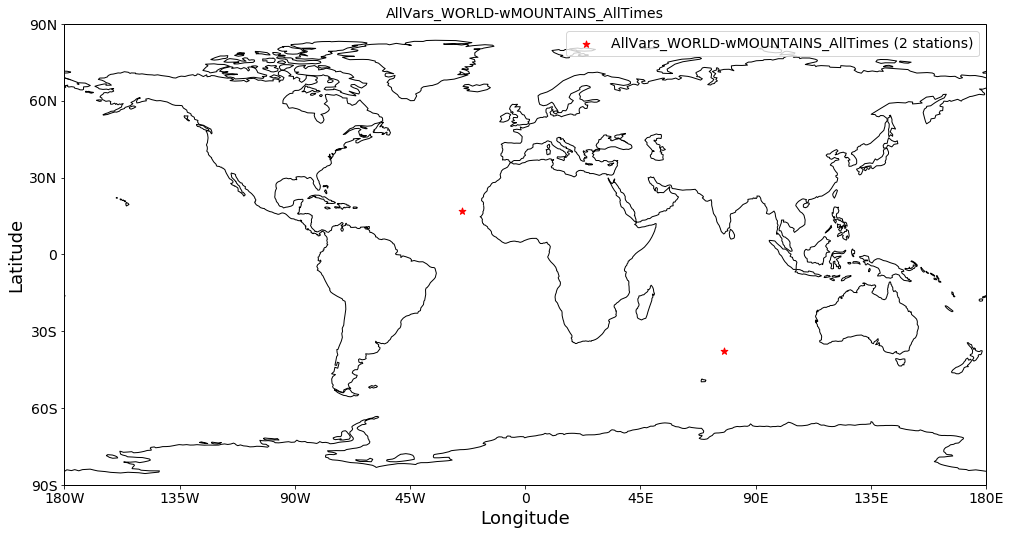

In [15]:
data.plot_station_coordinates(markersize=50, marker='*');

Here we can see a plot of the locations of Amsterdam Island and Cape Verde Observatory.

##### 2.2) plot the stations that contains vmrdms data in 2000 specifiyng the parameters var_name, start, and stop.

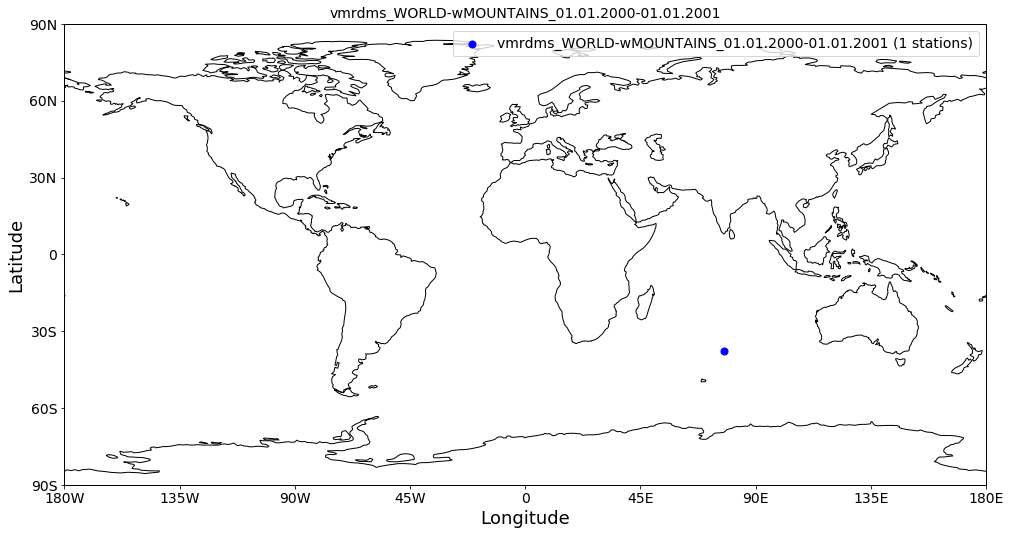

In [16]:
ax = data.plot_station_coordinates(var_name='vmrdms', 
                                   start=2000, 
                                   stop=2001, 
                                   color='blue',
                                   markersize=50, 
                                   marker='o')

Since only Amsterdam Island contains vmrdsm data in 2000, this is the only station location plotted in the figure above.

##### 2.3) Filter the data by common attributes before plotting, for instance:

In [17]:
subset = data.filter_by_meta(latitude=(10, 20), longitude=(-30, -20))
print(subset)


Pyaerocom UngriddedData
-----------------------
Contains networks: ['DMS_AMS_CVO']
Contains variables: ['vmrdms', 'vmrdms_flag']
Contains instruments: ['unknown']
Total no. of meta-blocks: 1
Filters that were applied:
 Filter time log: 20190626131304
	latitude: (10, 20)
	longitude: (-30, -20)


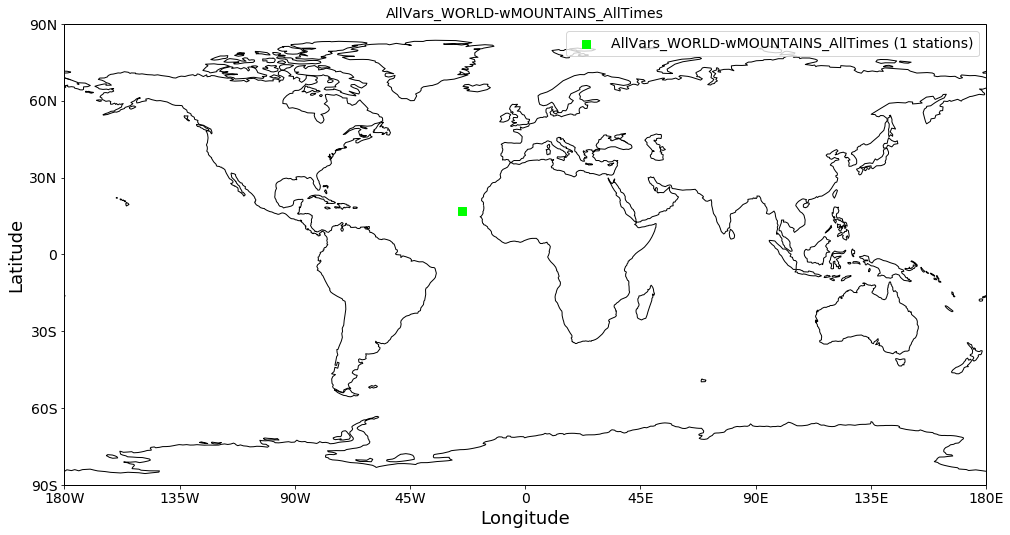

In [18]:
subset.plot_station_coordinates(color='lime',
                                markersize=50,
                                marker='s');

Different parameters can be specified. To get an overview of these, call the help function.

In [19]:
help(data.plot_station_coordinates)

Help on method plot_station_coordinates in module pyaerocom.ungriddeddata:

plot_station_coordinates(var_name=None, filter_name=None, start=None, stop=None, ts_type=None, color='r', marker='o', markersize=8, fontsize_base=10, **kwargs) method of pyaerocom.ungriddeddata.UngriddedData instance
    Plot station coordinates on a map
    
    All input parameters are optional and may be used to add constraints 
    related to which stations are plotted. Default is all stations of all 
    times.
    
    Parameters
    ----------
    
    var_name : :obj:`str`, optional
        name of variable to be retrieved
    filter_name : :obj:`str`, optional
        name of filter (e.g. EUROPE-noMOUNTAINS)
    start 
        start time (optional)
    stop 
        stop time (optional). If start time is provided and stop time not, 
        then only the corresponding year inferred from start time will be 
        considered
    ts_type : :obj:`str`, optional
        temporal resolution
    color : str

#### 3) Timeseries of the selected variables at one of the stations

##### 3.1) First define the station, and then plot the desire variable at that location calling plot_timeseries.

/home/paulinast/anaconda3/envs/pyaerocom_env/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


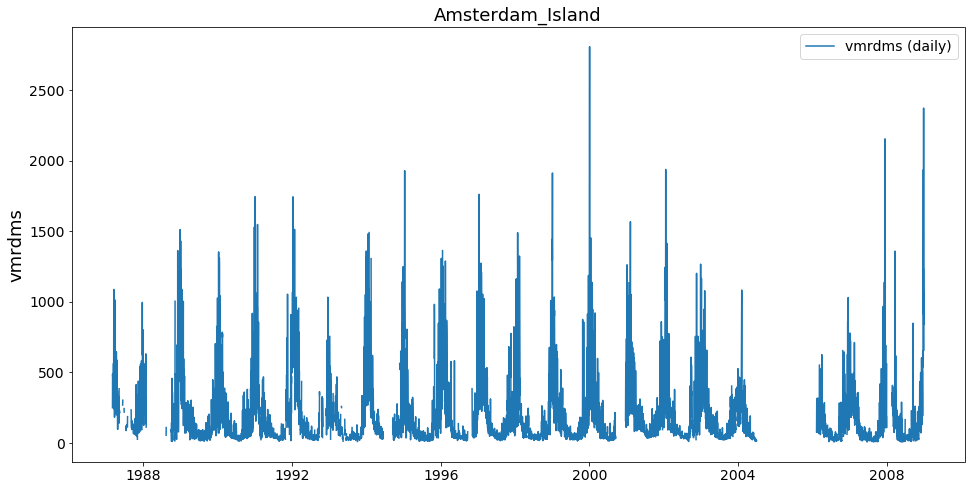

In [20]:
stat = data['Amsterdam_Island']
ax = stat.plot_timeseries('vmrdms')

##### 3.2) Call plot_station_timeseries directly on the UngriddedData object.

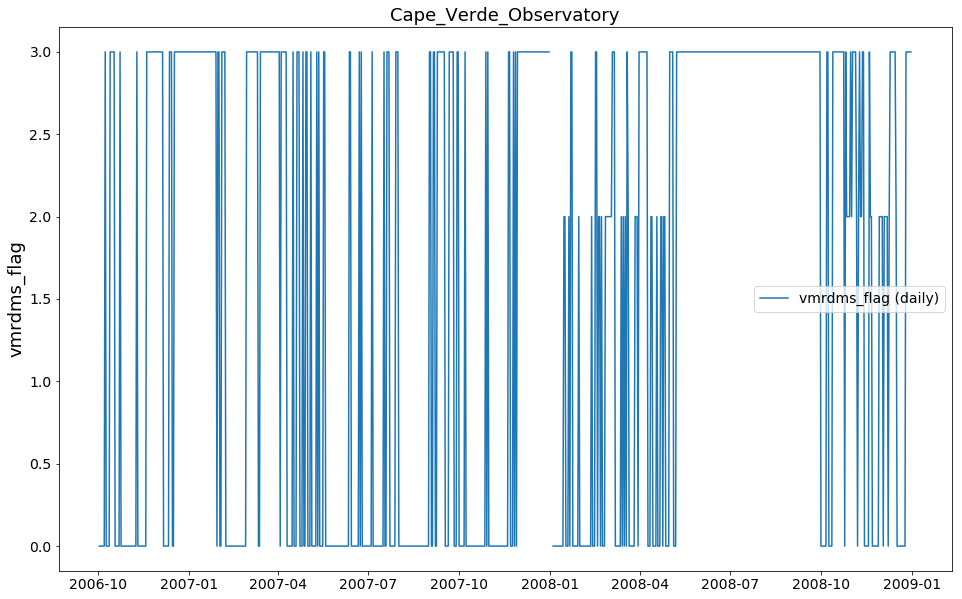

In [21]:
data.plot_station_timeseries(station_name='Cape_Verde_Observatory', var_name = 'vmrdms_flag')

##### 3.3) Plot one variable at multiple locations

Text(0.5, 1.0, 'vmrdms')

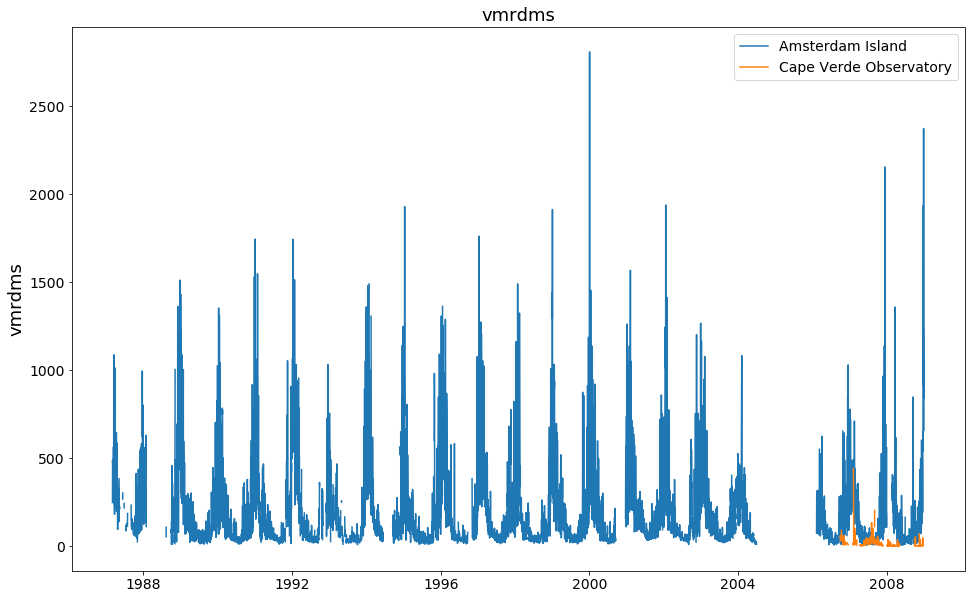

In [22]:
ax = data.plot_station_timeseries(station_name='Amsterdam_Island', 
                                  var_name = 'vmrdms', 
                                  label='Amsterdam Island')
data.plot_station_timeseries(station_name='Cape_Verde_Observatory',
                             var_name = 'vmrdms', 
                             ax=ax, 
                             label='Cape Verde Observatory')
ax.set_title("vmrdms")

Notice that: 

    1) the DMS values measured at Cape Verde Observatory are much lower than those mesured at Amsterdam Island;
    2) there is a gap in the data between 01.07.2004 and 09.02.2006;
    3) seasonality and interannual variability.



#### 4) Other useful attributes

##### 4.1) Access all station names and print the first 4:

This is useful when the list of stations is long

In [23]:
stat_names = data.station_name
print(stat_names[:4])

['Amsterdam_Island', 'Cape_Verde_Observatory']


Since we only have 2 stations, these are the only ones that are displayed.

Essentially, what data.station_name does is, it iterates over all metadata-dictionaries (that are stored in data.metadata, and are organised per file that was read) and extracts the station_name attribute and appends it to a list which is then returned by the method.

Hence, the list of station names corresponds to the list of metadata-blocks / files that are stored in the data object:

In [24]:
len(stat_names)

2

##### 4.2) In a similar manner, you can access coordinates latitude, longitude and altitude arrays for all files.

In [25]:
lons = data.longitude
lons

[77.53, -24.871]

In [26]:
lats = data.latitude
lats

[-37.8, 16.848]

In [27]:
alts = data.altitude
alts

[65.0, 10.0]

##### 4.3) List of unique station names

As mentioned earlier, some databases provide more than one data file per station. Since the ungridded reading (see previous) tutorial is done per data file, this means that their can be more than one metadata-block per station (not the case here, though). In any case, you can get a list of unique station names using:

In [28]:
unique_names = data.unique_station_names
unique_names

['Amsterdam_Island', 'Cape_Verde_Observatory']

#### 5) StationData: Access the data from individual stations

As you could see above the metadata dictionaries in the UngriddedData class for each file do only contain the associated metadata. For the sake of performance the actual data arrays are all stored in one big 2D numpy array (which does not need to bother you too much) which is accessible in the _data attribute of the UngriddedData object (if you like to dive into it).

In most cases that concern model evaluation, the observation data is analysed station-by-station. For this purpose the StationData class was designed, which is introduced below.

Starting from an instance of the UngriddedData object, the individual station data (i.e. time series of one or more variables + metadata) can be accessed using the method:

UngriddedData.to_station_data

or using the square brackets [] which is equivalent to the former as it is only a wrapper for to_station_data. This meants, calling

UngriddedData[0]

will give you the same output as

UngriddedData.to_station_data[0]

that is, the data associated with the first file that was read (i.e. the first metadata-block in the object) into the UngriddedData object.

To specify the station, you can either use the metadata index of the corresponding data file (meta_idx=9, for 10th file) or you can specify the station name or a wildcard specifying the station name.

The method returns a pyaerocom.StationData object, which is a dictionary-like object which contains data vectors and time-stamps as well as metadata.

Below we will illustrate the several options to access station data (and show that they contain the same data):


##### 5.1) Option 1. Get station data using the corresponding metadata indices that match the station name.

Find index (or indices) that match the station name:

In [29]:
index = data.find_station_meta_indices('Amsterdam_Island')
index

[0.0]

The result shows that there is one file that matches this station name (as we would expect for DMS_AMS_CVO data) and the corresponding metadata index is 0.0.

To access the data, you can use the method to_station_data. It helps to have a look into the options of this method:

In [30]:
help(data.to_station_data)

Help on method to_station_data in module pyaerocom.ungriddeddata:

to_station_data(meta_idx, vars_to_convert=None, start=None, stop=None, freq=None, merge_if_multi=True, merge_pref_attr=None, merge_sort_by_largest=True, insert_nans=False) method of pyaerocom.ungriddeddata.UngriddedData instance
    Convert data from one station to :class:`StationData`
    
    Todo
    ----
    - Review for retrieval of profile data (e.g. Lidar data)
    
    Parameters
    ----------
    meta_idx : float
        index of station or name of station.
    vars_to_convert : :obj:`list` or :obj:`str`, optional
        variables that are supposed to be converted. If None, use all 
        variables that are available for this station
    start
        start time, optional (if not None, input must be convertible into
        pandas.Timestamp)
    stop 
        stop time, optional (if not None, input must be convertible into
        pandas.Timestamp)
    freq : str
        pandas frequency string (e.g. 'D' fo

So the first input argument takes either the metadata index, or the name of the station. Here we use the metadata index option using the index that we just retrieved:

In [31]:
amsterdam_island_dms = data.to_station_data(meta_idx=index[0], insert_nans=True)
type(amsterdam_island_dms)

pyaerocom.stationdata.StationData

The returned data type is an instance of the pyaerocom.StationData class.

### Store the data object

In [32]:
%store data

# read the data from the storage
# %store -r data

Stored 'data' (UngriddedData)


### Compare with previous results

### J. Sciare et al. (2000)
https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/2000JD900236

#### Number of observations

In [33]:
# 1990-1999
dms_ai = data['Amsterdam_Island'].vmrdms
dms_ai_9099 = dms_ai['1990-08-1':'1999-12-31']

print('Number of non-NA/null observations in the dataset:', dms_ai_9099.count())
print('Number of observations in the paper: 2822')

Number of non-NA/null observations in the dataset: 2820
Number of observations in the paper: 2822


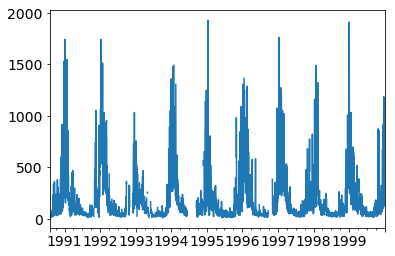

In [34]:
dms_ai_9099.plot()

Compare to Figure 2.

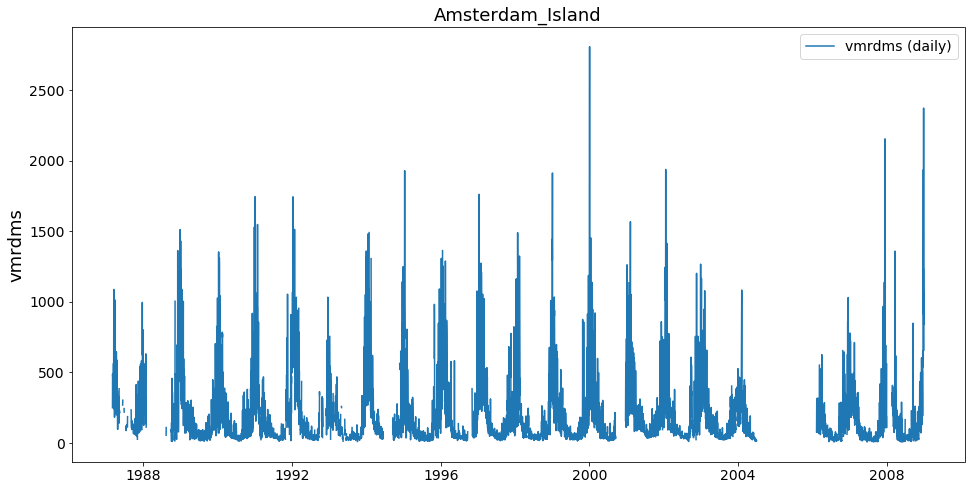

In [35]:
stat = data['Amsterdam_Island']
ax = stat.plot_timeseries(var_name='vmrdms')

#### Climatology
Compare the following results to the values in Table 1.

In [36]:
dms_ai_monthly_mean_9099 = dms_ai_9099.resample('M').mean()

dms_climat_9099 = dms_ai_monthly_mean_9099.groupby(
        dms_ai_monthly_mean_9099.index.month).mean()


dms_ai_monthly_median_9099 = dms_ai_9099.resample('M').median()

dms_median_9099 = dms_ai_monthly_median_9099.groupby(
        dms_ai_monthly_median_9099.index.month).median()

print('DMS climatology (mean and median) at Amsterdam Island (1990-1999):', '\n')

fmt = '{:<8}{:<8}{}'

print(fmt.format('', 'Mean', 'Median'))
for i, (mean, median) in enumerate(zip(dms_climat_9099, dms_median_9099)):
    print(fmt.format(i+1, round(mean), round(median)))

DMS climatology (mean and median) at Amsterdam Island (1990-1999): 

        Mean    Median
1       578     452
2       384     380
3       228     166
4       114     93
5       87      70
6       57      52
7       38      36
8       38      32
9       62      47
10      112     68
11      156     96
12      338     236


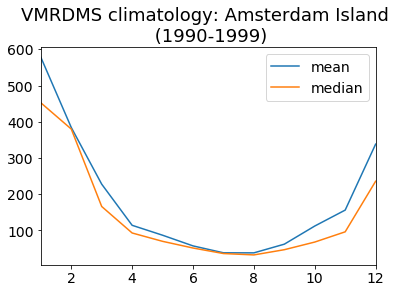

In [37]:
plt.figure()
ax = dms_climat_9099.plot(label='mean')
ax.set_title('VMRDMS climatology: Amsterdam Island \n (1990-1999)')
dms_median_9099.plot(label='median', ax=ax)
plt.legend(loc='best')
plt.show()

### AEROCOM 2010 presentation
https://aerocom.met.no/DATA/AEROCOM_WORK/oxford10/pdf_pap/suntharalingam_sulfate_2010.pdf

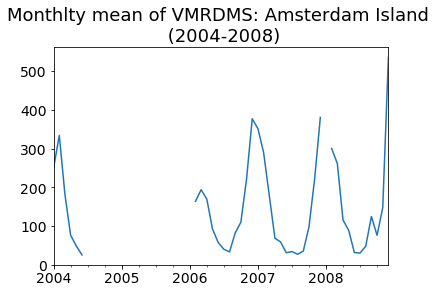

In [38]:
 # 2004-2008
# plot monthly mean
dms_ai = data['Amsterdam_Island'].vmrdms
dms_ai_0408 = dms_ai['2004-1-1':'2008-12-31']
dms_ai_monthly_mean_0408 = dms_ai_0408.resample('M').mean()
plt.figure()
ax = dms_ai_monthly_mean_0408.plot()
ax.set_title('Monthlty mean of VMRDMS: Amsterdam Island \n (2004-2008)')
plt.show()

In [39]:
# calculate climatology
dms_climat_0408 = dms_ai_monthly_mean_0408.groupby(
        dms_ai_monthly_mean_0408.index.month).mean()
print('DMS climatology at Amsterdam Island (2004-2008):', '\n')

dms_std_0408 = dms_ai_monthly_mean_0408.groupby(
    dms_ai_monthly_mean_0408.index.month).std()

fmt = '{:<8}{:<8}{}'

print(fmt.format('','Mean', 'Std'))
#for i, mean in enumerate(dms_climat_0408):
#    print(fmt.format(i+1, mean))

for i, (mean, std) in enumerate(zip(dms_climat_0408, dms_std_0408)):
    print(fmt.format(i+1, round(mean), round(std)))

DMS climatology at Amsterdam Island (2004-2008): 

        Mean    Std
1       301     72
2       272     75
3       204     39
4       108     46
5       72      22
6       37      14
7       35      5
8       36      11
9       81      45
10      95      17
11      197     43
12      431     91


Compare to results in slide 5

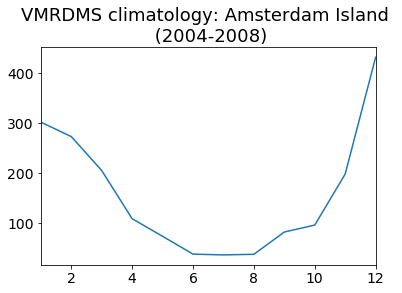

In [40]:
# plot climatology
plt.figure()
ax = dms_climat_0408.plot(label='mean')
ax.set_title('VMRDMS climatology: Amsterdam Island \n (2004-2008)')
plt.show()

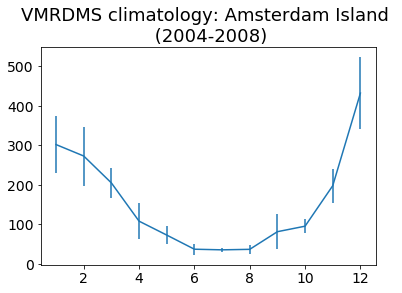

In [41]:
import numpy as np

plt.errorbar(np.arange(1, 13), dms_climat_0408, yerr=dms_std_0408)
plt.title('VMRDMS climatology: Amsterdam Island \n (2004-2008)')
plt.show()

# Models


### NorESM

In [42]:
pya.browse_database('*NorESM*')


Pyaerocom ReadGridded
---------------------
Data ID: NORESM.T2.1_CTL.v3
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE/NORESM.T2.1_CTL.v3/renamed
Available experiments: ['CTL.v3']
Available years: [2008, 2009]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550aercs', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bs5503Daer', 'cheaqpso4', 'chegpso4', 'chep3Dsoa', 'chepmsa', 'chepsoa', 'clh', 'cll', 'clm', 'clt', 'clt3D', 'conccnacc', 'conccnaer', 'conccnait', 'conccnbcacc', 'conccnbcait', 'conccnbccoa', 'conccncoa', 'conccndustacc', 'conccndustait', 'conccndustcoa', 'conccnoaacc', 'conccnoaait', 'conccnoacoa', 'conccnso4acc', 'conccnso4ait', 'conccnso4coa', 'conccnssacc', 'conccnssait', 'conccnsscoa', 'drybc', 'drydepvelhno3', 'drydepvelno2', 'drydepvelo3', 'drydepvelpan', 'drydms', 'drydust', 'dryhn

In [72]:
import warnings
warnings.filterwarnings('ignore')
reader_m = pya.io.ReadGridded('NORESM.T2.1_CTL')
vmrdms_m= reader_m.read_var('vmrdms', start=2008)

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


pyaerocom.GriddedData
Grid data: <iris 'Cube' of vmrdms / (1) (time: 12; atmosphere_hybrid_sigma_pressure_coordinate: 26; latitude: 96; longitude: 144)>

Colocation

In [44]:
DATA_ID = 'DMS_AMS_CVO'
VAR_TO_READ = ['vmrdms']
reader = pya.io.ReadUngridded(DATA_ID)
vmrdms_o = data = reader.read(vars_to_retrieve=VAR_TO_READ)

vmrdms -999999999999.99 0
vmrdms_nd -9999 1
vmrdms_std -99999.0 2
vmrdms_flag -9999 3
vmrdms -999999999999.99 0
vmrdms_nd -9999 1
vmrdms_std -99999.0 2
vmrdms_flag -9999 3
Dataset name: DMS_AMS_CVO
Data directory: /lustre/storeA/project/aerocom/aerocom1/AEROCOM_OBSDATA/PYAEROCOM/DMS_AMS_CVO/data
Supported variables: ['vmrdms', 'vmrdms_nd', 'vmrdms_std', 'vmrdms_flag']
Last revision: 20190619


In [67]:
data_coloc = pya.colocation.colocate_gridded_ungridded(vmrdms_m, vmrdms_o, ts_type='monthly')
data_coloc

This method is deprecated. Please use new name resample_time


MetaDataError: Cannot remove outliers for variable vmrdms. Found invalid units. Error: MetaDataError('Failed to access unit information for variable vmrdms. Expected unit mole mole-1')

In [46]:
#for i, meta in vmrdms_o.metadata.items():
 #   print(meta['latitude'])
vmrdms_o.metadata[0]


OrderedDict([('latitude', -37.8),
             ('longitude', 77.53),
             ('altitude', 65.0),
             ('filename', 'ams137s00.lsce.as.fl.dimethylsulfide.nl.da.dat'),
             ('station_name', 'Amsterdam_Island'),
             ('ts_type', 'daily'),
             ('data_id', 'DMS_AMS_CVO'),
             ('dataset_name', 'DMS_AMS_CVO'),
             ('data_version', 200907),
             ('variables', ['vmrdms']),
             ('instrument_name', 'unknown'),
             ('var_info', 'some info')])

In [47]:
reader_m = pya.io.ReadGridded('NORESM.T2.1_CTL.v2')
vmrdms_m= reader_m.read_var('vmrdms', start=2008)

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


In [48]:
import warnings
#DATA_DIR='/lustre/storeA/project/aerocom/aerocom-users-database/ECLIPSE/eclipse.NorESM2.Test92f19_f19_0003_0004/renamed'
warnings.filterwarnings('ignore')
reader_m = pya.io.ReadGridded('NORESM.T2.1_CTL.v3')
vmrdms_m= reader_m.read_var('vmrdms', start=2008)

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


In [49]:
vmrdms_m.dimcoord_names

['time',
 'atmosphere_hybrid_sigma_pressure_coordinate',
 'latitude',
 'longitude']

In [50]:
vmrdms_m.atmosphere_hybrid_sigma_pressure_coordinate

DimCoord(array([992.5561   , 970.55483  , 929.648875 , 867.16076  , 787.70206  ,
       696.79629  , 600.5242   , 510.455255 , 433.895225 , 368.81798  ,
       313.501265 , 266.481155 , 226.513265 , 192.539935 , 163.66207  ,
       139.115395 , 118.250335 , 100.514695 ,  85.439115 ,  70.05915  ,
        53.114605 ,  37.23029  ,  23.944625 ,  13.967214 ,   7.3888135,
         3.544638 ]), standard_name='atmosphere_hybrid_sigma_pressure_coordinate', units=Unit('unknown'), long_name='hybrid level at midpoints (1000*(A+B))', var_name='lev', attributes={'invalid_units': 'level', 'positive': 'down'})

In [51]:
vmrdms_m.reorder_dimensions_tseries()
vmrdms_m.dimcoord_names

['time',
 'latitude',
 'longitude',
 'atmosphere_hybrid_sigma_pressure_coordinate']

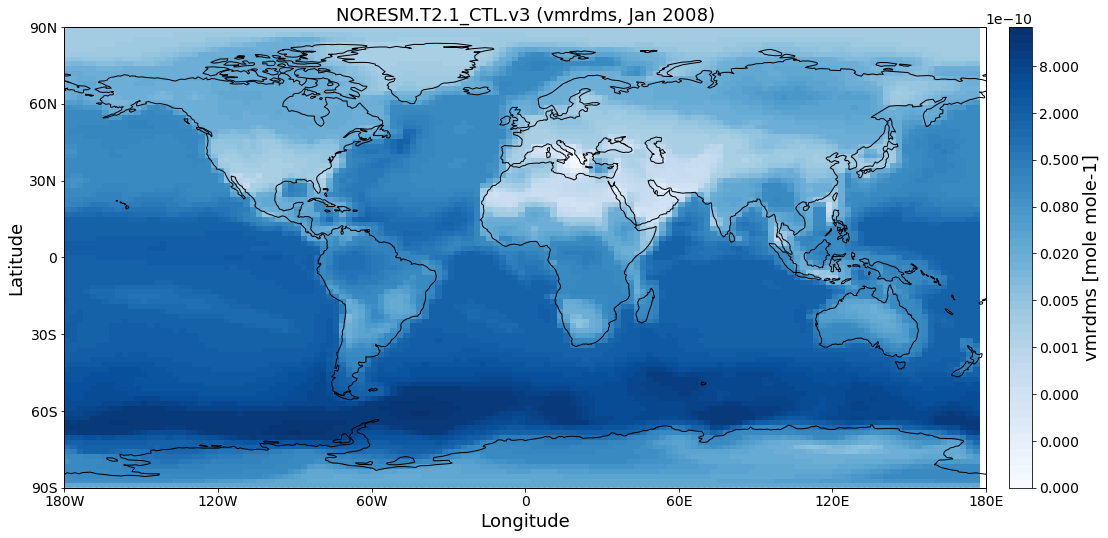

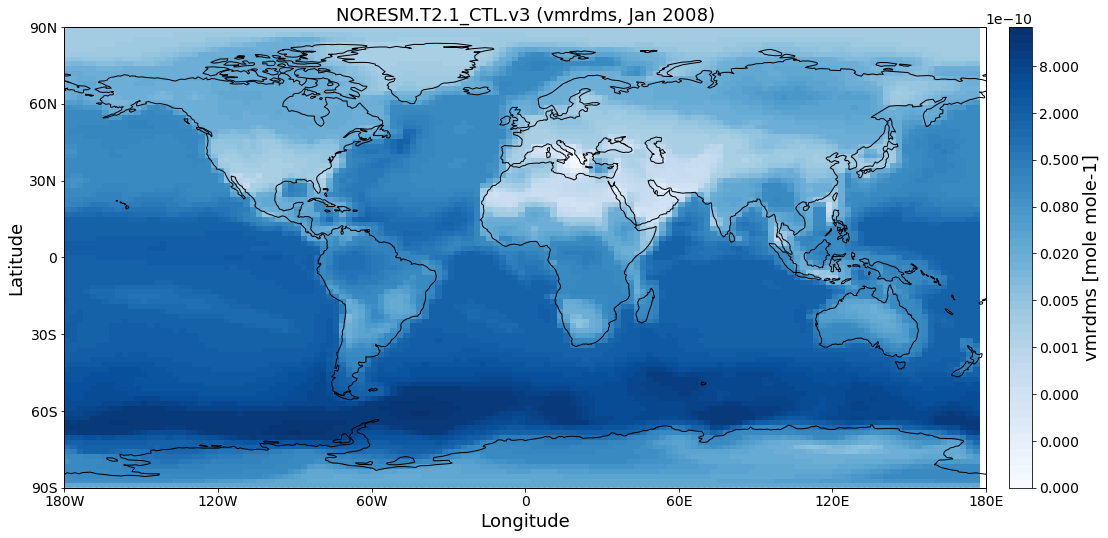

In [52]:
subset = vmrdms_m[:,:,:,0]
subset.quickplot_map()

In [53]:
subset.to_time_series(latitude=45, longitude=15)[0]

Interpolating data of shape (12, 96, 144). This may take a while.
Successfully interpolated cube


StationData([('dtime', []),
             ('var_info',
              BrowseDict([('vmrdms', {'units': Unit('mole mole-1')})])),
             ('station_coords',
              {'latitude': None, 'longitude': None, 'altitude': None}),
             ('data_err', BrowseDict()),
             ('overlap', BrowseDict()),
             ('data_flagged', BrowseDict()),
             ('filename', None),
             ('station_id', None),
             ('station_name', None),
             ('instrument_name', None),
             ('PI', None),
             ('country', None),
             ('ts_type', 'monthly'),
             ('latitude', 45),
             ('longitude', 15),
             ('altitude', nan),
             ('data_id', 'NORESM.T2.1_CTL.v3'),
             ('dataset_name', None),
             ('data_product', None),
             ('data_version', None),
             ('data_level', None),
             ('revision_date', None),
             ('website', None),
             ('ts_type_src', None),
       

In [54]:
pya.browse_database('*CNRM*')


Pyaerocom ReadGridded
---------------------
Data ID: CNRM-CM6.2t127_AP3-CTRL2015
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CNRM-CM6.2t127_AP3-CTRL2015/renamed
Available experiments: ['AP3-CTRL2015']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['drybc', 'drydust', 'dryoa', 'dryso4', 'dryss', 'emibc', 'emidust', 'emioa', 'emiso2', 'emiss', 'loadbc', 'loaddust', 'loadoa', 'loadso4', 'loadss', 'od550bc', 'od550dust', 'od550oa', 'od550so4', 'od550ss', 'sconcbc', 'sconcdust', 'sconcoa', 'sconcso4', 'sconcss', 'wetbc', 'wetdust', 'wetoa', 'wetso4', 'wetss']

Pyaerocom ReadGridded
---------------------
Data ID: CNRM-AESM2_AP3-CTRL2016-PD
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III/CNRM-AESM2_AP3-CTRL2016-PD/renamed
Available experiments: ['AP3-CTRL2016-PD']
Available years: [2010]
Available frequencies ['monthly']
Available variables: ['clt', 'cltl', 'drybc', 'drydust',

### ECEARTH

In [55]:
pya.browse_database('*amip*')


Pyaerocom ReadGridded
---------------------
Data ID: CAM53-Oslo_7310_MG15CLM45_5feb2017AG_7310AMIP1850V
Data directory: /lustre/storeA/project/aerocom/aerocom2/NorESM_SVN_TEST/CAM53-Oslo_7310_MG15CLM45_5feb2017AG_7310AMIP1850V/renamed
Available experiments: ['7310AMIP1850V']
Available years: [9999]
Available frequencies ['monthly']
Available variables: ['abs440aer', 'abs440aercs', 'abs500aer', 'abs5503Daer', 'abs550aer', 'abs550bc', 'abs550dryaer', 'abs550dust', 'abs550oa', 'abs550so4', 'abs550ss', 'abs670aer', 'abs870aer', 'airmass', 'area', 'asy3Daer', 'bc5503Daer', 'cheaqpso4', 'chegpso4', 'chepso2', 'cl3D', 'clt', 'drybc', 'drydms', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'ec5503Daer', 'ec550dryaer', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiso4', 'emiss', 'hus', 'landf', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'mmraerh2o', 'mmrbc', 'mmrdu', 'mmroa', 'mmrso4', 'mmrss', 'od440aer', 'od440csaer', 'od550aer', 'od550aerh2o', 'od55

Failed to import file aerocom3_GFDL-AM4-amip_HIST_orog_Surface_1870_fixed.nc
Model: GFDL-AM4-amip_HIST
Error: TemporalResolutionError('Invalid frequency fixed')
Failed to import file aerocom3_GFDL-AM4-amip_HIST_sftlf_Surface_1870_fixed.nc
Model: GFDL-AM4-amip_HIST
Error: TemporalResolutionError('Invalid frequency fixed')



Pyaerocom ReadGridded
---------------------
Data ID: GFDL-AM4-amip_HIST
Data directory: /lustre/storeA/project/aerocom/aerocom-users-database/AEROCOM-PHASE-III-2019/GFDL-AM4-amip_HIST/renamed
Available experiments: ['HIST']
Available years: [1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1

In [56]:
reader_m = pya.io.ReadGridded('CAM5-Oslo_FAMIPWARMCnudge-emi2000.A2.CTRL')
vmrdms_m = reader_m.read_var('vmrdms')

Invalid var_name time for coord None in cube. Overwriting with time
Invalid long_name None for coord time in cube. Overwriting with Time
Invalid long_name latitude for coord lat in cube. Overwriting with Center coordinates for latitudes
Invalid long_name longitude for coord lon in cube. Overwriting with Center coordinates for longitudes


In [57]:
print(vmrdms_m)

pyaerocom.GriddedData: CAM5-Oslo_FAMIPWARMCnudge-emi2000.A2.CTRL
Grid data: vmrdms                                               (time: 12; atmosphere_hybrid_sigma_pressure_coordinate: 30; latitude: 192; longitude: 288)
     Dimension coordinates:
          time                                            x                                                -             -               -
          atmosphere_hybrid_sigma_pressure_coordinate     -                                                x             -               -
          latitude                                        -                                                -             x               -
          longitude                                       -                                                -             -               x
     Auxiliary coordinates:
          Surface pressure                                x                                                -             x               x
          hybrid A coefficien

In [58]:
vmrdms_m.time

DimCoord(array([  0.,  31.,  60.,  91., 121., 152., 182., 213., 244., 274., 305.,
       335.]), standard_name='time', units=Unit('days since 2000-01-01 00:00:00', calendar='gregorian'), long_name='Time', var_name='time')

In [59]:
vmrdms_m.time_stamps()

array(['2000-01-01T00:00:00.000000', '2000-02-01T00:00:00.000000',
       '2000-03-01T00:00:00.000000', '2000-04-01T00:00:00.000000',
       '2000-05-01T00:00:00.000000', '2000-06-01T00:00:00.000000',
       '2000-07-01T00:00:00.000000', '2000-08-01T00:00:00.000000',
       '2000-09-01T00:00:00.000000', '2000-10-01T00:00:00.000000',
       '2000-11-01T00:00:00.000000', '2000-12-01T00:00:00.000000'],
      dtype='datetime64[us]')

In [60]:
vmrdms_m.dimcoord_names

['time',
 'atmosphere_hybrid_sigma_pressure_coordinate',
 'latitude',
 'longitude']

In [61]:
vmrdms_m.atmosphere_hybrid_sigma_pressure_coordinate

DimCoord(array([  3.64346569,   7.59481965,  14.35663225,  24.61222   ,
        38.26829977,  54.59547974,  72.01245055,  87.82123029,
       103.31712663, 121.54724076, 142.99403876, 168.22507977,
       197.9080867 , 232.82861896, 273.91081676, 322.24190235,
       379.10090387, 445.9925741 , 524.68717471, 609.77869481,
       691.38943031, 763.40448111, 820.85836865, 859.53476653,
       887.02024892, 912.64454694, 936.19839847, 957.48547954,
       976.32540739, 992.55609512]), standard_name='atmosphere_hybrid_sigma_pressure_coordinate', units=Unit('unknown'), long_name='hybrid level at midpoints (1000*(A+B))', var_name='lev', attributes={'invalid_units': 'level', 'positive': 'down'})

In [62]:
vmrdms_m_6 = vmrdms_m[:, 6, :, :]

In [63]:
vmrdms_m.reorder_dimensions_tseries()
#subset = vmrdms_m.sel(longitude=15, latitude=45)
tsurf = vmrdms_m.to_time_series(latitude=45, longitude=15, vert_scheme="surface")
tsurf

Interpolating data of shape (12, 192, 288). This may take a while.
Successfully interpolated cube


[StationData([('dtime', []),
              ('var_info', BrowseDict([('vmrdms', {'units': Unit('1')})])),
              ('station_coords',
               {'latitude': None, 'longitude': None, 'altitude': None}),
              ('data_err', BrowseDict()),
              ('overlap', BrowseDict()),
              ('data_flagged', BrowseDict()),
              ('filename', None),
              ('station_id', None),
              ('station_name', None),
              ('instrument_name', None),
              ('PI', None),
              ('country', None),
              ('ts_type', 'monthly'),
              ('latitude', 45),
              ('longitude', 15),
              ('altitude', nan),
              ('data_id', 'CAM5-Oslo_FAMIPWARMCnudge-emi2000.A2.CTRL'),
              ('dataset_name', None),
              ('data_product', None),
              ('data_version', None),
              ('data_level', None),
              ('revision_date', None),
              ('website', None),
              ('ts_t

In [64]:
import geonum

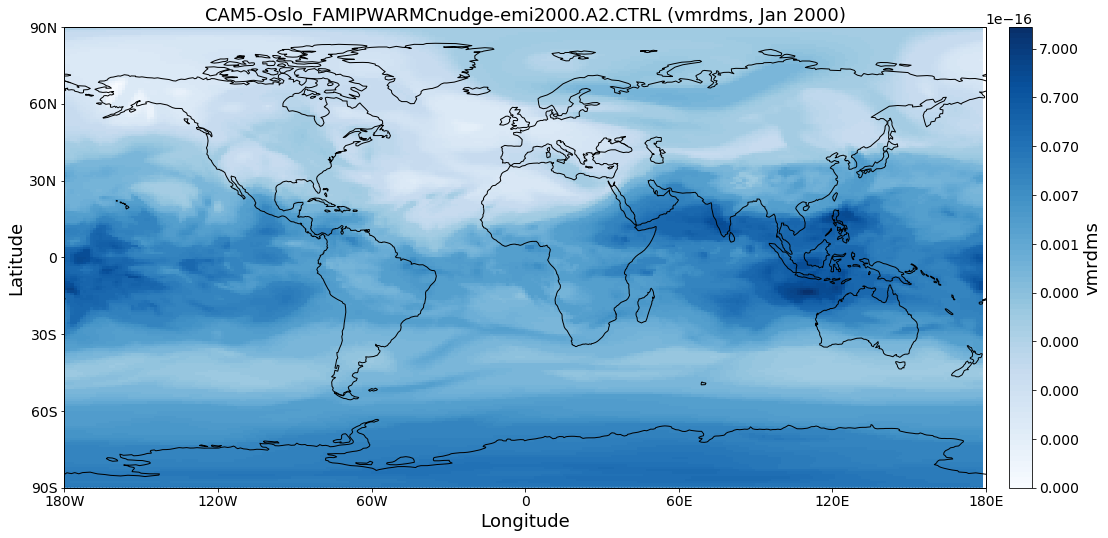

In [65]:
fig1 = vmrdms_m_6.quickplot_map('2000-01-01')

### IPSL

In [66]:
pya.browse_database('*IPSL*')


Pyaerocom ReadGridded
---------------------
Data ID: IPSL-CM5A-LR_historical
Data directory: /lustre/storeA/project/aerocom/aerocom2/INCA/IPSL-CM5A-LR_historical/renamed
Available experiments: ['']
Available years: [1850, 1980, 1985, 1990, 1995, 2000, 2005]
Available frequencies ['monthly']
Available variables: ['abs550aer', 'loadbc', 'loadoa', 'loadso4', 'od550aer', 'od550lt1aer']
